In [1]:
# imports used in go here 
import warnings
warnings.filterwarnings("ignore")
# Tabular data friends:
import pandas as pd
import numpy as np
import math
# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn stuff:

# Data acquisition
from pydataset import data
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import acquire
import prepare

In [2]:
# Import data
df = acquire.get_telco_data()

# Initial Explore for Preping and Cleaning Data

### Observations- Initial look at data
* total_charges needs to be converted to a float
* total_charges null values appear to be new cutomers since they have a monthly charge but have yet to be charged. Replce the null's with 0.
* Joiner and duplicate features need to be dropped: Unnamed: 0, payment_type_id, internet_service_type_id
* churn will be the Target feature
* Some payment_type denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis
* dummy colums are needed for ML model
* drop senior_citizen due to small percentage of observations making it a poor predictive feature
* multiple_lines, phone_service, and gender all have mutual information scores near 0, and should be dropped

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
df.describe(include='all')

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
count,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043.000000,...,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,NaN,7043,2,NaN,2,2,NaN,...,3,3,3,2,NaN,6531,2,3,3,4
top,NaN,NaN,NaN,NaN,0002-ORFBO,Male,NaN,No,No,NaN,...,No,No,No,Yes,NaN,,No,Month-to-month,Fiber optic,Electronic check
freq,NaN,NaN,NaN,NaN,1,3555,NaN,3641,4933,NaN,...,3473,2810,2785,4171,NaN,11,5174,3875,3096,2365
mean,3521.000000,2.315633,1.872923,1.690473,NaN,NaN,0.162147,NaN,NaN,32.371149,...,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN
std,2033.283305,1.148907,0.737796,0.833755,NaN,NaN,0.368612,NaN,NaN,24.559481,...,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN
25%,1760.500000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,9.000000,...,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN
50%,3521.000000,2.000000,2.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,29.000000,...,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN
75%,5281.500000,3.000000,2.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,55.000000,...,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN


#### Notes for Prep Function

In [5]:
# Joiner and duplicate features need to be dropped add to prep function
#df = df.drop_duplicates()
#df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
'''
running drop list 
drop(columns=['Unnamed: 0','payment_type_id','internet_service_type_id','contract_type_id','senior_citizen','gender','multiple_lines','phone_service'])
'''

"\nrunning drop list \ndrop(columns=['Unnamed: 0','payment_type_id','internet_service_type_id','contract_type_id','senior_citizen','gender','multiple_lines','phone_service'])\n"

In [6]:
# address total_charges dtype and null values add to prep function
#df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [7]:
# remove (automatic) from payment method names add to prep function
#df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '', regex=False)

In [8]:
# create colums needed for ML model add to prep function
#dummy_df = pd.get_dummies(df[['gender','partner','dependents','tech_support','streaming_tv','streaming_movies', 'paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
#df = pd.concat([df, dummy_df], axis=1)
'''
running dummy list
dummy_df = pd.get_dummies(df[['partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True, True])
'''


"\nrunning dummy list\ndummy_df = pd.get_dummies(df[['partner','dependents','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']],dummy_na=False, drop_first=[True, True])\n"

In [9]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
train, validate, test = prepare.split_data(df,'churn')

train -> (4225, 40), 59.99%
validate -> (1409, 40),20.01%
test -> (1409, 40), 20.01%


#### Chart for Churn

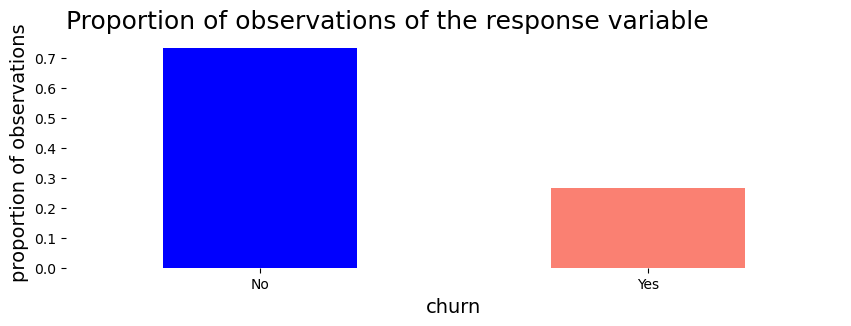

In [10]:
# create a figure
fig = plt.figure(figsize=(10, 3)) 
ax = fig.add_subplot(111)
# proportion of observation of each class
prop_response = df['churn'].value_counts(normalize=True)
# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['blue','salmon'])
# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')
# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

#### Function for Stacked plots- to use for exploration

In [11]:
# Making a function to create a stack plot to explore feature to churn rates
def percentage_stacked_plot(columns_to_plot, super_title):  
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=18,  y=.95)
    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['churn']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['blue','salmon'])
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='churn', fancybox=True)
        # set title and labels
        ax.set_title('Proprtion of Observations by ' + column,
                     fontsize=10, loc='center')
        ax.tick_params(rotation='auto')
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

### Chart Demographics

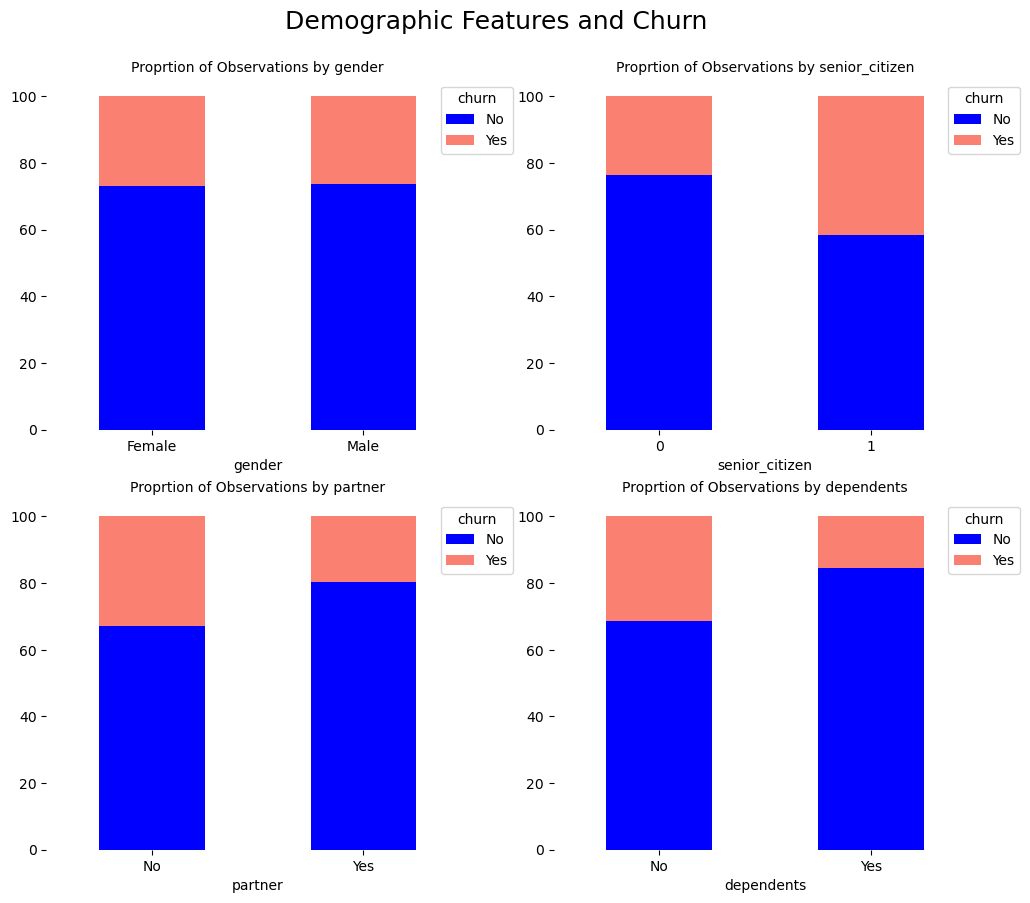

In [12]:
# Lets look at the demographics effect on churn
# demographic column names
demographic_columns = ['gender', 'senior_citizen', 'partner', 'dependents']

# stacked plot of demographic columns

percentage_stacked_plot(demographic_columns, 'Demographic Features and Churn')

In [13]:
# Is senior_citizen important? What percentage of the observations are they?
(df.senior_citizen.sum())/df.shape[0]

0.1621468124378816

#### Observations: Demographic Features
* gender appears to have no impact 
* senior citizens appear to churn less
    * however, they only make up 16.21% of observation making it an unreliable predictor
* customers with a partner or dependents appear to churn less


### Chart Catagorical Account Info

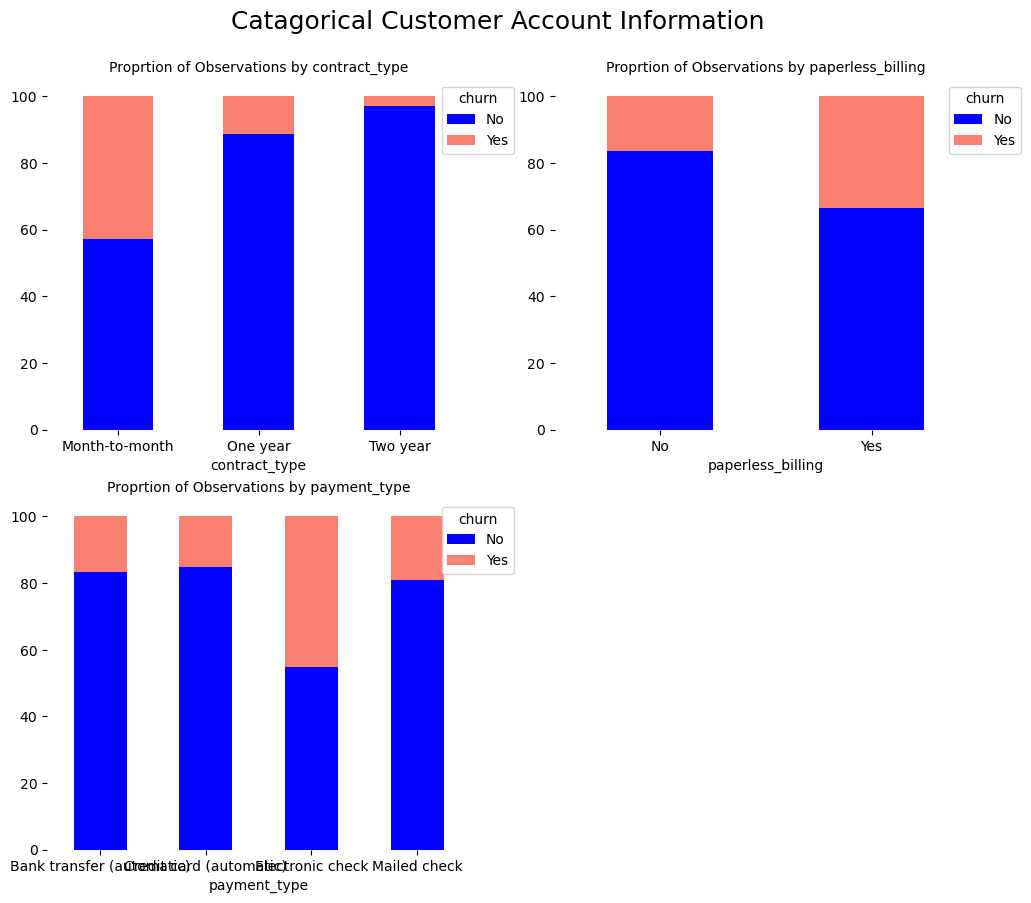

In [14]:
# Let's look into account Information's impact on churn

# customer account column names
account_columns = ['contract_type', 'paperless_billing', 'payment_type']

# stacked plot of catagorical customer account columns
percentage_stacked_plot(account_columns, 'Catagorical Customer Account Information')

#### Observations: Catagorical Account Info
* Month-to-month contracts have higher churn rates compared to clients with yearly contracts
    * This makes since since the barrier to churn while on contract is high
    * This option is not likely to go away, but may be cause to promote contracts to M2M customers
* Customers with electronic check as paying method are more likely to leave the company
* Customers with paperless billing churn more often

### Chart Numerical Account Info

#### Function for Layered Histogram

In [15]:
# lets make some layered histograms to evaluate the numerical cust. acct. features
def histogram_plots(columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        # histograms for each class (normalized histogram)
        train[train['churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                   alpha=0.5, color='blue', label='No')
        train[train['churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                    alpha=0.5, color='salmon', label='Yes')
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='churn', fancybox=True)
        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
        

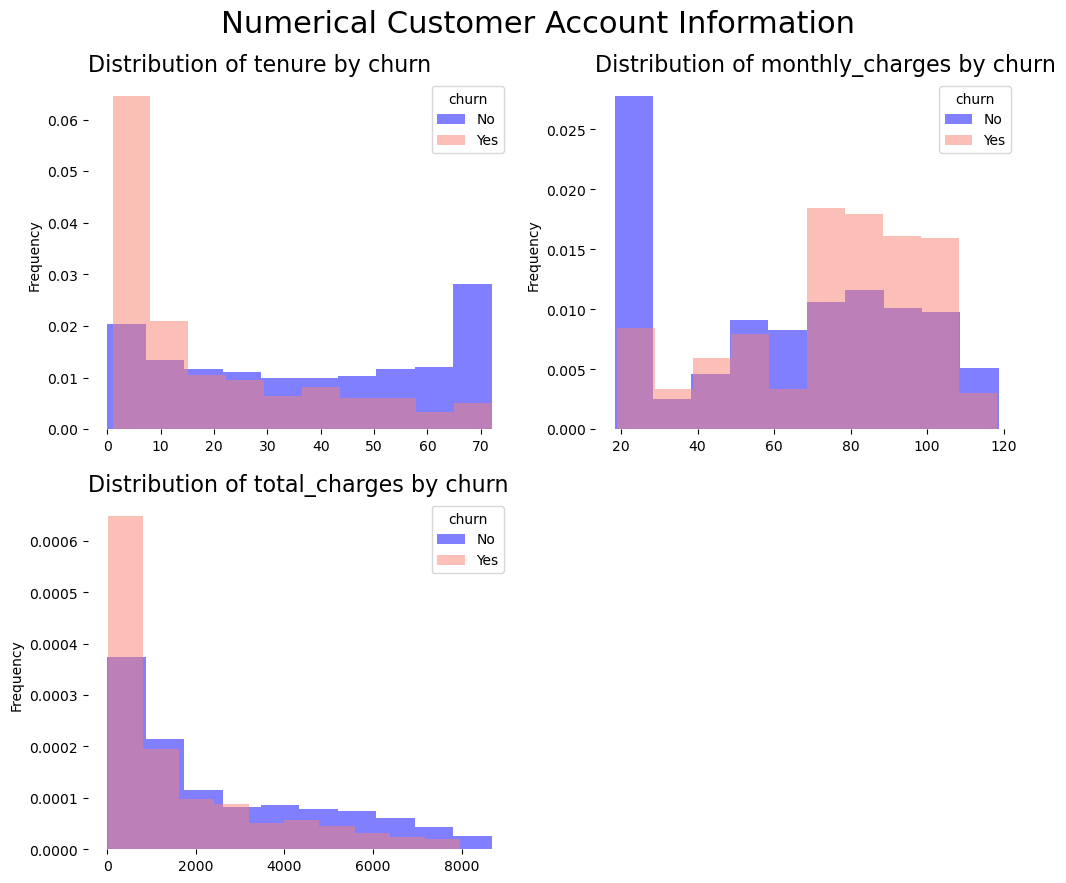

In [16]:
# chart evaluate the numerical cust. acct. features

account_columns_numeric = ['tenure', 'monthly_charges', 'total_charges']
histogram_plots(account_columns_numeric, 'Numerical Customer Account Information')

#### Observations: Numerical Customer Account Information
* High monthly charges appear to lead to higher churn rates
* New customers appera to churn faster than long term customers
* High total charges appear to have lower churn rates
    * this is likely due to tenure of these customers more so than the higher charges 

### Chart Services Information

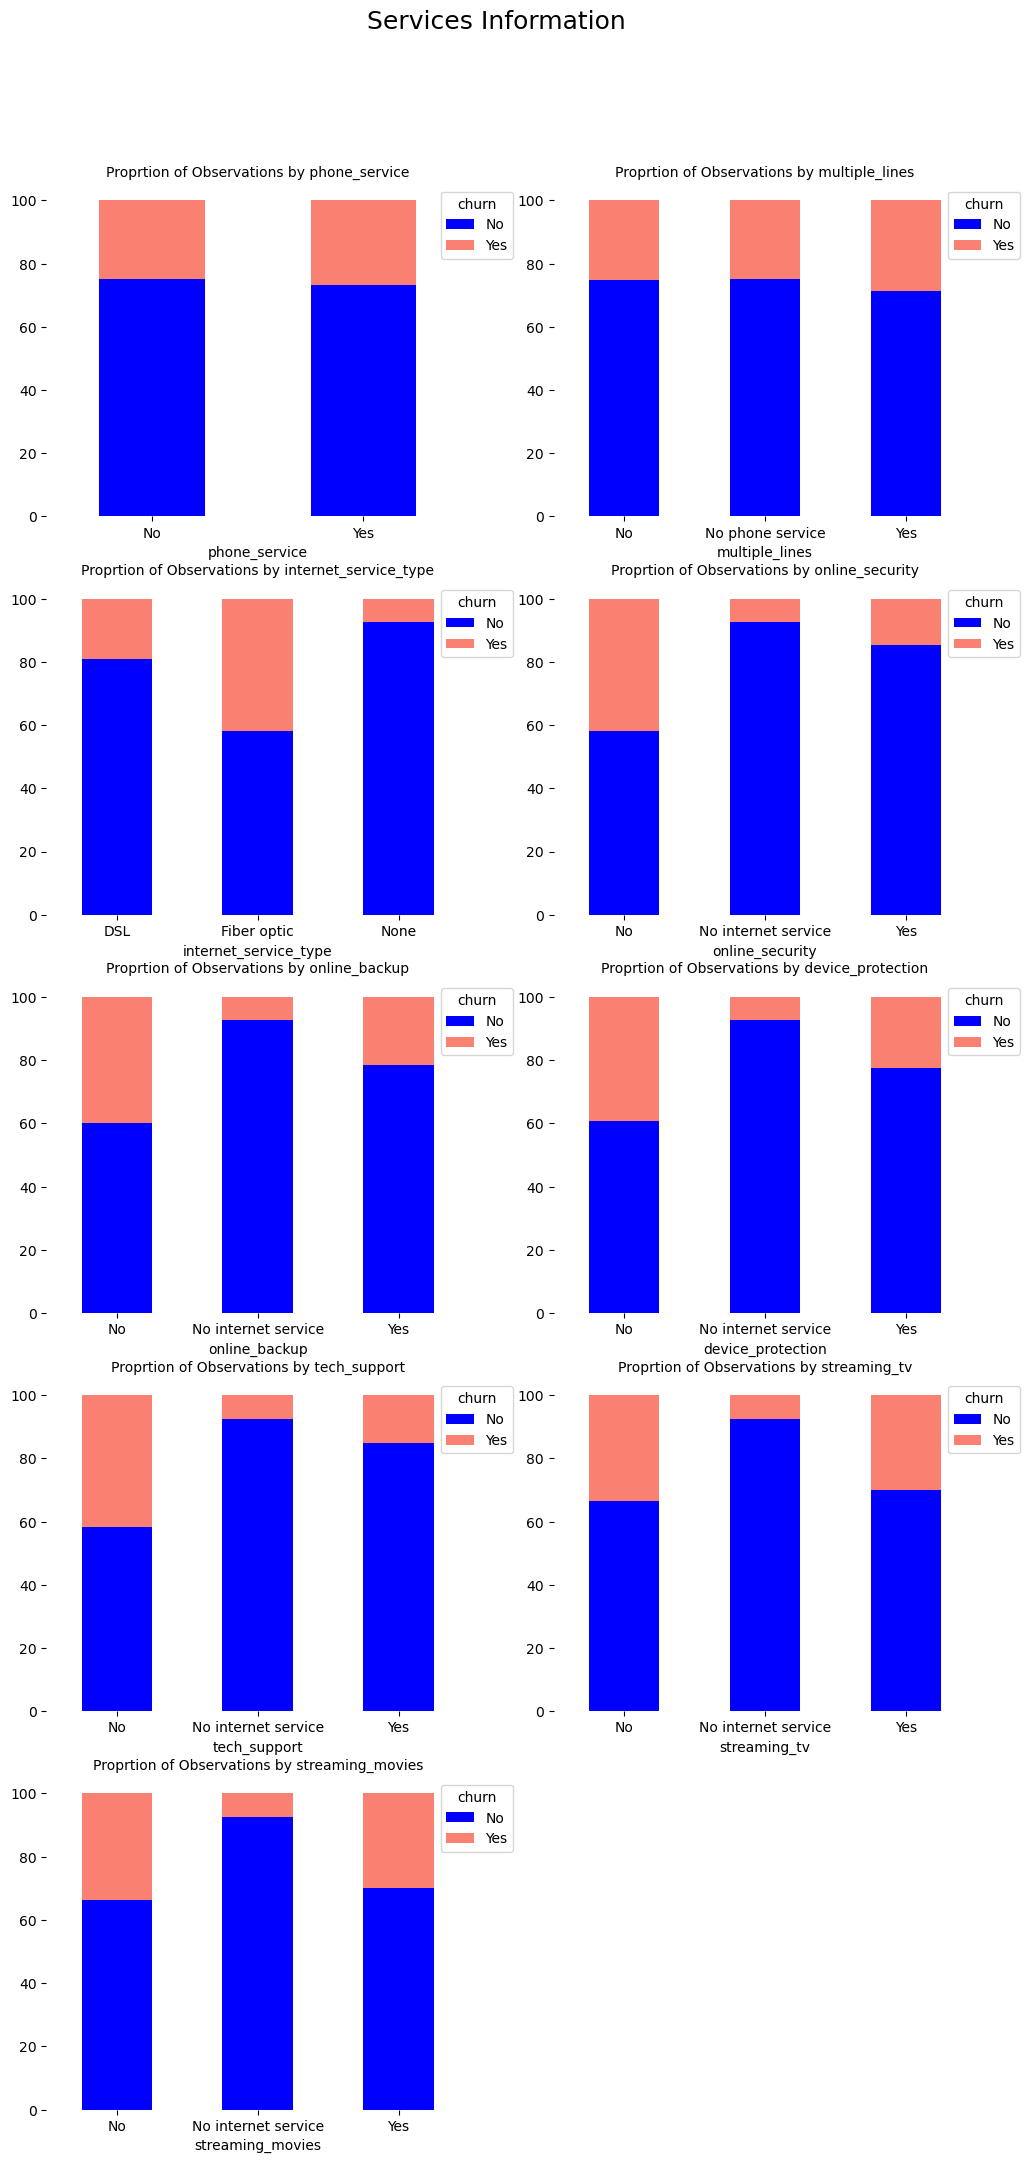

In [17]:
#lets stack some more plots to look at services impact on churn
# services column names
services_columns = ['phone_service', 'multiple_lines', 'internet_service_type', 'online_security',
                   'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

#### Observations: Service Information
* phone related features seem to have no real predictive value for churn rates
* Not having tech support seems to indicate higher churn rates
* Fiber optic customers apperar to churn at a higher rate
* The other features appear to have a similar minimal impact on churn rates 
    * these features all have similar effects, perhaps they all come together
    * so I will ignore them for now

### Check for Catagorical Feature Independence

#### Function for Mutual Infomation Score

In [18]:
#Lets see what catagorical variables are truly independent of chur using mutual information scores to confirm some observations above

# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, train.churn)

In [19]:
# select categorial variables excluding the response variable 
categorical_variables = train.select_dtypes(include=object).drop('churn', axis=1)
# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
# visualize feature importance
print(feature_importance)

customer_id              0.578554
contract_type            0.096297
online_security          0.060187
tech_support             0.057529
internet_service_type    0.053148
online_backup            0.046266
payment_type             0.044651
device_protection        0.041469
streaming_tv             0.030157
streaming_movies         0.029924
paperless_billing        0.018440
dependents               0.014243
partner                  0.012857
multiple_lines           0.000740
phone_service            0.000068
gender                   0.000035
dtype: float64


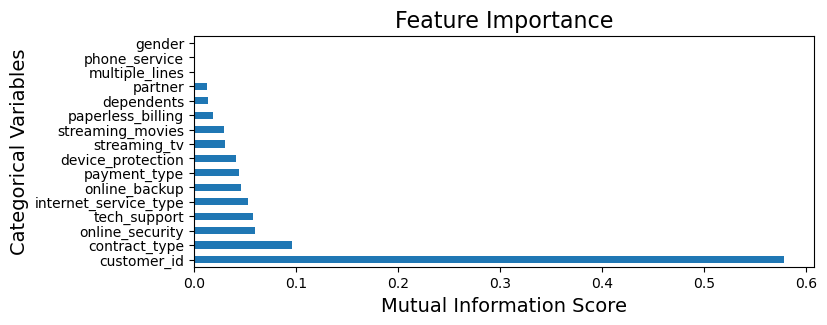

In [20]:
# lets make it a chart to help visualize
ig, ax = plt.subplots(figsize=(8,3))
feature_importance.plot.barh(ax=ax)
ax.set_title('Feature Importance', fontsize=16)
ax.set_xlabel('Mutual Information Score', fontsize=14)
ax.set_ylabel('Categorical Variables', fontsize=14)
plt.show()

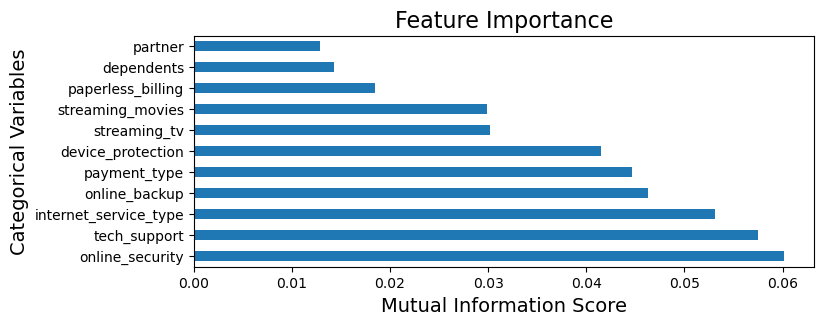

In [21]:
# lets drop irrelevent features to get a better look
categorical_variables2 = train.select_dtypes(include=object).drop(columns=['churn','customer_id','contract_type','gender','phone_service','multiple_lines'], axis=1)
feature_importance = categorical_variables2.apply(compute_mutual_information).sort_values(ascending=False)
ig, ax = plt.subplots(figsize=(8,3))
feature_importance.plot.barh(ax=ax)
ax.set_title('Feature Importance', fontsize=16)
ax.set_xlabel('Mutual Information Score', fontsize=14)
ax.set_ylabel('Categorical Variables', fontsize=14)
plt.show()

#### Observation: Independence Confirmation
* multiple_lines, phone_service, and gender all have mutual information scores near 0 
* this confirms the observations above that they are truly independent of churn
* this means they will not have significant predictive value for churn
* customer_id should be ignored since it is just a key to ID the account
* contract_type should be ignored as well for the reasons mentioned in Observations: Catagorical Account Info


# Explore 

In [42]:
## First lets make a final prep and split function

In [43]:

def final_prep_telco(df):
    '''
    This function will drop any duplicate observations,
    Clean up the total_charges
    drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'gender', 'contract_type_id', 'senior_citizen', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'total_charges', 'contract_type'])
    and create dummy vars from 'partner','dependents','tech_support','paperless_billing','churn','contract_type','internet_service_type','payment_type' 
    Then it drops the unneded dummies, and corrects fomatting for internet_service_type_Fiber optic'
    '''
    df = df.drop_duplicates()
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'gender', 'contract_type_id', 'senior_citizen', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'total_charges', 'contract_type'])
    dummy_df = pd.get_dummies(df[['partner','dependents','tech_support','churn','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    df = df.rename(columns={'internet_service_type_Fiber optic': 'internet_service_type_fiber_optic'})
    df = df.rename(columns={'payment_type_Electronic check': 'payment_type_electronic_check'})
    df = df.drop(columns=['internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Mailed check','tech_support_No internet service','internet_service_type_None'])
    return df

In [44]:
def split_data(df,strat):
    '''
    Be sure to code it as train, validate, test = split_data(df,'column you want to stratify')
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[{strat}])
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[{strat}])
    # Validate my split.
    print(f'train -> {train.shape}, {round(train.shape[0]*100 / df.shape[0],2)}%')
    print(f'validate -> {validate.shape},{round(validate.shape[0]*100 / df.shape[0],2)}%')
    print(f'test -> {test.shape}, {round(test.shape[0]*100 / df.shape[0],2)}%')
    return train, validate, test

In [45]:
#Acquire Data
df = acquire.get_telco_data()


In [46]:
#Clean and Prepare Data
df = prepare.final_prep_telco(df)
df.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_electronic_check
5170,7272-QDCKA,No,No,28,No,No,100.2,No,Fiber optic,Electronic check,0,0,0,0,1,1


In [47]:
# Split
train, validate, test = prepare.split_data(df,'churn')

train -> (4225, 16), 59.99%
validate -> (1409, 16),20.01%
test -> (1409, 16), 20.01%


In [48]:
train.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_electronic_check
5809,8180-AKMJV,No,No,1,No,Yes,44.55,No,DSL,Credit card (automatic),0,0,0,0,0,0


In [49]:
train.shape    

(4225, 16)

## Statistics by Feature Group

### Demographics Statistics
lets do some stats on our remaining demographics: partner and dependents

#### Hypothisis for partner
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent on marital status<br>
$H_a$ : Churn is dependent on marital status


In [50]:
# create crosstab of observations
observed = pd.crosstab(train.churn, train.partner)
observed

partner,No,Yes
churn,,
No,1439,1665
Yes,722,399


In [51]:
# Get expected values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [52]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')
# print the values from the 'observed' dataframe
print(observed.values)
# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')
# print the expected values array
print(expected.astype(int))
# print a new line
print('---\n')
# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 
# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p:.4f}')

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000


In [53]:
alpha = 0.05

In [54]:
# function for evaluation
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'There exists some relationship between {group1} and the {group2}. (p-value: {p})')
    else:
        print(f'There is not a significant relationship between {group1} and {group2}. (p-value: {p})')


In [55]:
# run the evaluation
eval_results(p, alpha, group1='churn', group2='partner')


There exists some relationship between churn and the partner. (p-value: 5.362120825511991e-25)


##### Observation: Partner 
* $\chi^2$ test reveals that there is a relationship between churn and the partner
* Therefore, we reject the $H_0$
    

#### Hypothisis for dependents
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent on whether or not customers have dependents<br>
$H_a$ : Churn is dependent on whether or not customers have dependents

In [56]:
# Consolidated CHI testing
group1='churn'
group2='dependents'
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1439 1665]
 [ 722  399]]
---
Expected Values

[[1587 1516]
 [ 573  547]]
---

chi^2 = 106.6312
p-value = 0.0000
There exists some relationship between churn and the dependents. (p-value: 5.362120825511991e-25)


##### Observation: Partner 
* $\chi^2$ test reveals that there is a relationship between churn and whether or not customers have dependents
* Therefore, we reject the $H_0$

### Catagorical Customer Account Information Statistics
lets do some stats on our remaining Catagorical Customer Account Information:  paperless_billing, payment_type

#### Hypothisis for paperless_billing
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of paperless_billing<br>
$H_a$ : Churn is dependent of paperless_billing

In [57]:
# Consolidated CHI testing
group1='churn'
group2='paperless_billing'
alpha = 0.05
observed = pd.crosstab(train.churn, train.paperless_billing)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[1433 1671]
 [ 283  838]]
---
Expected Values

[[1260 1843]
 [ 455  665]]
---

chi^2 = 148.5845
p-value = 0.0000
There exists some relationship between churn and the paperless_billing. (p-value: 3.5348504574964642e-34)


##### Observation: paperless_billing 
* $\chi^2$ test reveals that there is a relationship between churn and paperless_billing
* Therefore, we reject the $H_0$

#### Hypothisis for payment_type_electronic_check
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of payment_type_electronic_check<br>
$H_a$ : Churn is dependent of payment_type_electronic_check

In [58]:
# Consolidated CHI testing
group1='churn'
group2='payment_type_electronic_check'
alpha = 0.05
observed = pd.crosstab(train.churn, train.payment_type_electronic_check)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[2324  780]
 [ 478  643]]
---
Expected Values

[[2058 1045]
 [ 743  377]]
---

chi^2 = 381.5760
p-value = 0.0000
There exists some relationship between churn and the payment_type_electronic_check. (p-value: 5.647318991682941e-85)


##### Observation: payment_type 
* $\chi^2$ test reveals that there is a relationship between churn and payment_type_electronic_check
* Therefore, we reject the $H_0$

### Numerical Customer Account Information Statistics
lets do some stats on our remaining Numerical Customer Account Information Statistics: tenure, monthly_charges

#### Hypothisis for tenure
Churn is catagorical, and tenure is a continuous number features so lets do a One Sample T-Test<br>
$H_0$ : The mean tenure of churned customers is = the mean tenure of all churned customers<br>
$H_a$ : The mean tenure of churned customers is != the mean tenure of all churned customers

In [59]:
# first establish means and alpha
alpha = .05
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [60]:
# One Sample T-Test
churn_sample = train[train.churn == 'Yes'].tenure
overall_mean = train.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(-24.280881230430392, 5.680256511980203e-105)

In [61]:
# For a 2-tailed test, we take the p-value as is
if p == alpha:
    print("We fail to reject Null Hypothisis")
else:
    print("We reject Null Hypothisis")

We reject Null Hypothisis


##### Observation: tenure 
* One Sample T-Test reveals that there is a significant relationship between churn and tenure
* Therefore, we reject the $H_0$
* This mens there is a significant relationship between churn and tenure

#### Hypothisis for monthly_charges
Churn is catagorical, and tenure is a continuous number features so lets do a One Sample T-Test <br>
$H_0$ : Mean of monthly charges of churned customers <= Mean of monthly charges of all customers<br>
$H_a$ : Mean of monthly charges of churned customers > Mean of monthly charges of all customers

In [62]:
# One Sample T-Test
churn_sample = train[train.churn == 'Yes'].monthly_charges
overall_mean = train.monthly_charges.mean()
t, p = stats.ttest_1samp(churn_sample, overall_mean)
print(t, p/2, alpha)

12.65294490503547 1.0740986591134452e-34 0.05


In [63]:
# For a 1-tailed test, we evaluate p/2 < α and t > 0(to test if higher)

if p/2 > alpha:
    print("We fail to reject Null Hypothisis")
elif t < 0:
    print("We fail to reject Null Hypothisis")
else:
    print("We reject Null Hypothisis")


We reject Null Hypothisis


##### Observation: monthly_charges 
* One Sample T-Test reveals that mean of monthly charges of churned customers is greater than the mean of monthly charges of all customers
* Therefore, we reject the $H_0$
* This indicates that customers wigh higher monthly charges do churn more than average

### Service Features Statistics
lets do some stats on our most impactful service features: internet_service_type_fiber_optic, tech_support_Yes

#### Hypothisis for internet_service_type_fiber_optic
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of internet_service_type_fiber_optic<br>
$H_a$ : Churn is dependent of internet_service_type_fiber_optic


In [64]:
# Consolidated CHI testing
group1='churn'
group2='internet_service_type_fiber_optic'
alpha = 0.05
observed = pd.crosstab(train.churn, train.internet_service_type_fiber_optic)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[2022 1082]
 [ 348  773]]
---
Expected Values

[[1741 1362]
 [ 628  492]]
---

chi^2 = 387.4117
p-value = 0.0000
There exists some relationship between churn and the internet_service_type_fiber_optic. (p-value: 3.0293763443640615e-86)


##### Observation: internet_service_type_fiber_optic 
* $\chi^2$ test reveals that there is a relationship between churn and internet_service_type_fiber_optic
* Therefore, we reject the $H_0$

#### Hypothisis for tech_support_Yes
These are both catagorical features so lets use $\chi^2$ Chi-Square Contingency Table Test <br>
$H_0$ : Churn is independent of tech_support_Yes<br>
$H_a$ : Churn is dependent of tech_support_Yes

In [65]:
# Consolidated CHI testing
group1='churn'
group2='tech_support_Yes'
alpha = 0.05
observed = pd.crosstab(train.churn, train.tech_support_Yes)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') 
print(f'p-value = {p:.4f}')
eval_results(p, alpha, group1, group2)

Observed Values

[[2076 1028]
 [ 926  195]]
---
Expected Values

[[2205  898]
 [ 796  324]]
---

chi^2 = 98.2309
p-value = 0.0000
There exists some relationship between churn and the tech_support_Yes. (p-value: 3.7233642021021574e-23)


##### Observation: tech_support_Yes 
* $\chi^2$ test reveals that there is a relationship between churn and tech_support_Yes
* Therefore, we reject the $H_0$

#### A few more charts

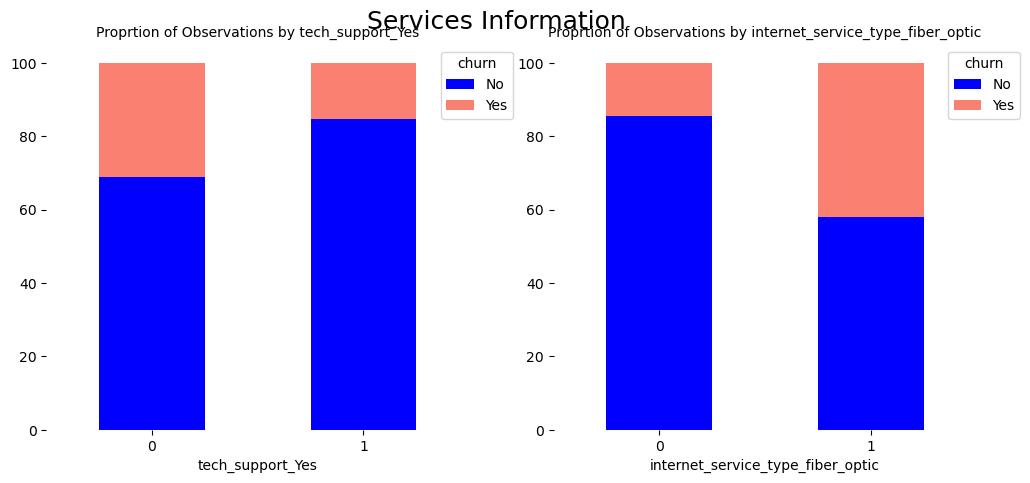

In [66]:
#lets stack some more plots to look at services impact on churn
# services column names
services_columns2 = ['tech_support_Yes','internet_service_type_fiber_optic']
# stacked plot of services columns
percentage_stacked_plot(services_columns2, 'Services Information')

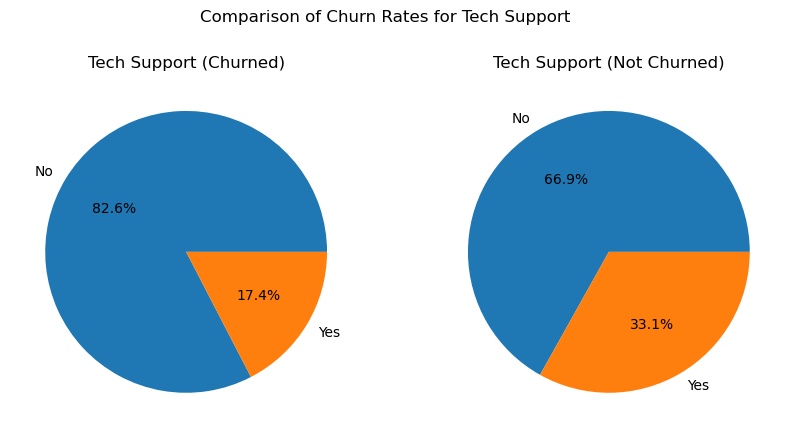

In [67]:
# split the data by churn status
churned = train[train['churn'] == 'Yes']
not_churned = train[train['churn'] == 'No']

# create two subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first pie chart for 'tech_support_Yes' among churned customers
ax1.pie(churned['tech_support_Yes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax1.set_title('Tech Support (Churned)')

# create the second pie chart for 'tech_support_Yes' among non-churned customers
ax2.pie(not_churned['tech_support_Yes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax2.set_title('Tech Support (Not Churned)')

# add a title for the overall plot
fig.suptitle('Comparison of Churn Rates for Tech Support')

plt.show()
#This one was not very helpful

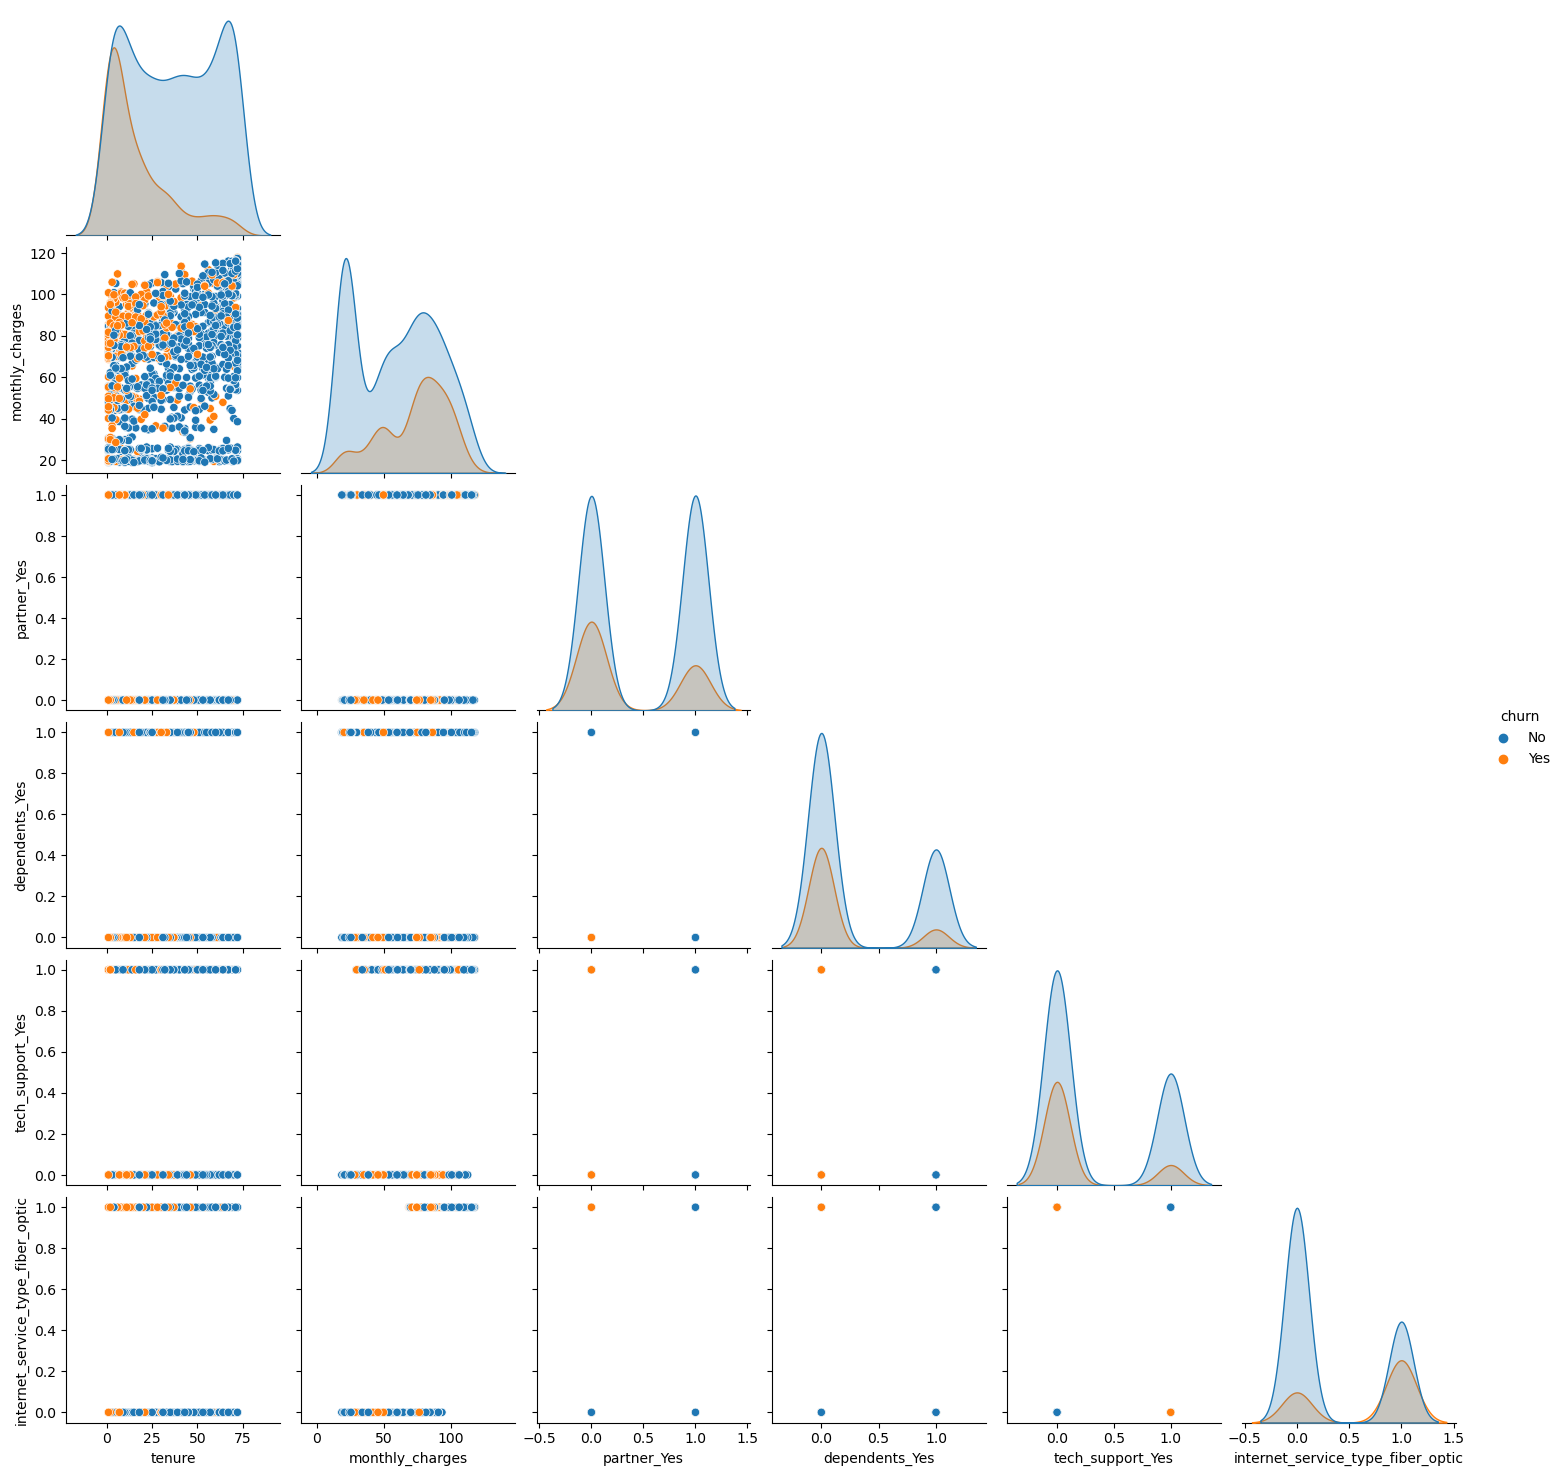

In [68]:
sns.pairplot(data=test, hue='churn', vars=['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes','tech_support_Yes', 'internet_service_type_fiber_optic'],corner=True)
plt.show()

# Modeling

## Create X & y Versions

In [69]:
train.sample()

,customer_id,partner,dependents,tenure,tech_support,paperless_billing,monthly_charges,churn,internet_service_type,payment_type,partner_Yes,dependents_Yes,tech_support_Yes,churn_Yes,internet_service_type_fiber_optic,payment_type_electronic_check
2897,4128-ETESU,Yes,No,47,No,No,99.7,No,Fiber optic,Electronic check,1,0,0,0,1,1


In [70]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_train = train.churn_Yes

X_validate = validate.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_validate = validate.churn_Yes

X_test = test.drop(['churn_Yes','churn','customer_id','partner','dependents','tech_support','paperless_billing','internet_service_type','payment_type'], axis=1)
y_test = test.churn_Yes


In [71]:
X_train.sample()

,tenure,monthly_charges,partner_Yes,dependents_Yes,tech_support_Yes,internet_service_type_fiber_optic,payment_type_electronic_check
100,3,19.95,0,0,0,0,0


In [156]:
f7 = X_train.columns.to_list()
f7

['tenure',
 'monthly_charges',
 'partner_Yes',
 'dependents_Yes',
 'tech_support_Yes',
 'internet_service_type_fiber_optic',
 'payment_type_electronic_check']

## Determin the Baseline Prediction

In [106]:
baseline_prediction = y_train.mode()
# Predict the majority class in the training set
baseline_pred = [0] * len(y_train)
print('Baseline accuracy:', accuracy_score(y_train, baseline_pred))

Baseline accuracy: 0.7346745562130178


In [107]:
## turns out the recall baseline is not useful here
#baseline_prediction = y_train.mode()
# Predict the majority class in the training set
baseline_pred = [0] * len(X_train)
print('Baseline recall:', recall_score(y_train, baseline_pred))

Baseline recall: 0.0


In [108]:
## turns out the recall baseline is not useful here

# Calculate the most frequent class in the training set
majority_class = y_train.mode()[0]

# Create a list of predictions that always predict the majority class
baseline_predictions = [majority_class] * len(y_train)

# Calculate the recall score of the baseline model
baseline_recall = recall_score(y_train, baseline_predictions, pos_label=majority_class)

print("Baseline recall score: {:.2f}".format(baseline_recall))

Baseline recall score: 1.00


## Function to Run Models and Return Accuraccy

In [109]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [110]:
create_models(seed=2)

[('k_nearest_neighbors', KNeighborsClassifier()),
 ('logistic_regression', LogisticRegression(random_state=2)),
 ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=2)),
 ('random_forest', RandomForestClassifier(random_state=2))]

In [111]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_train)
    # make predictions with the testing data
    predictions = model.predict(X_train)
    # calculate accuracy 
    accuracy = accuracy_score(y_train, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.831715976331361)
Classifier: logistic_regression, Accuracy: 0.7872189349112426)
Classifier: DecisionTreeClassifier, Accuracy: 0.9931360946745562)
Classifier: random_forest, Accuracy: 0.9931360946745562)


In [112]:
from sklearn.metrics import recall_score

results = []
names = []
scoring = 'recall' # use recall as the scoring metric
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_train)
    # calculate recall 
    recall = recall_score(y_train, predictions)
    # append the model name and the recall to the lists
    results.append(recall)
    names.append(name)
    # print classifier recall
    print('Classifier: {}, Recall: {})'.format(name, recall))

Classifier: k_nearest_neighbors, Recall: 0.5985727029438002)
Classifier: logistic_regression, Recall: 0.45227475468331846)
Classifier: DecisionTreeClassifier, Recall: 0.9812667261373773)
Classifier: random_forest, Recall: 0.9866190900981266)


In [113]:
from sklearn.metrics import precision_score

results = []
names = []
scoring = 'precision' # use precision as the scoring metric
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_train)
    # calculate precision 
    precision = precision_score(y_train, predictions)
    # append the model name and the precision to the lists
    results.append(precision)
    names.append(name)
    # print classifier precision
    print('Classifier: {}, Precision: {})'.format(name, precision))

Classifier: k_nearest_neighbors, Precision: 0.7199570815450643)
Classifier: logistic_regression, Precision: 0.6401515151515151)
Classifier: DecisionTreeClassifier, Precision: 0.9927797833935018)
Classifier: random_forest, Precision: 0.9875)


### Best Model Accuracy, Recall, and Precision
Classifier: logistic_regression, Accuracy: 0.8126330731014905)
Classifier: logistic_regression, Recall: 0.5267379679144385)
Classifier: logistic_regression, Precision: 0.6936619718309859)


### Trying Different Hyperparameters

In [114]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 3}


In [81]:
# lets plug these in and see what happens

In [132]:
def create_models2(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''
    models2 = []
    models2.append(('k_nearest_neighbors', KNeighborsClassifier(n_neighbors=100)))
    models2.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models2.append(('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=3,min_samples_split=4,random_state=seed)))
    models2.append(('random_forest', RandomForestClassifier(max_depth=3,random_state=seed)))
    return models2

# create a list with all the algorithms we are going to assess
models2 = create_models2()

In [133]:
create_models2(seed=123)

[('k_nearest_neighbors', KNeighborsClassifier(n_neighbors=100)),
 ('logistic_regression', LogisticRegression(random_state=123)),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=123)),
 ('random_forest', RandomForestClassifier(max_depth=3, random_state=123))]

In [134]:
# Running Accuracy with adjusted Hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models2:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_train)
    # make predictions with the testing data
    predictions = model.predict(X_train)
    # calculate accuracy 
    accuracy = accuracy_score(y_train, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7895857988165681)
Classifier: logistic_regression, Accuracy: 0.7872189349112426)
Classifier: DecisionTreeClassifier, Accuracy: 0.7869822485207101)
Classifier: random_forest, Accuracy: 0.7810650887573964)


In [135]:
# Running Recall with adjusted Hyperparameters

results = []
names = []
scoring = 'recall' # use recall as the scoring metric
for name, model in models2:
    # fit the model with the training data
    model.fit(X_train, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_train)
    # calculate recall 
    recall = recall_score(y_train, predictions)
    # append the model name and the recall to the lists
    results.append(recall)
    names.append(name)
    # print classifier recall
    print('Classifier: {}, Recall: {})'.format(name, recall))

Classifier: k_nearest_neighbors, Recall: 0.45227475468331846)
Classifier: logistic_regression, Recall: 0.45227475468331846)
Classifier: DecisionTreeClassifier, Recall: 0.3773416592328278)
Classifier: random_forest, Recall: 0.2925958965209634)


In [136]:
# Running Precision with adjusted Hyperparameters

results = []
names = []
scoring = 'precision' # use precision as the scoring metric
for name, model in models2:
    # fit the model with the training data
    model.fit(X_train, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate precision 
    precision = precision_score(y_test, predictions)
    # append the model name and the precision to the lists
    results.append(precision)
    names.append(name)
    # print classifier precision
    print('Classifier: {}, Precision: {})'.format(name, precision))

Classifier: k_nearest_neighbors, Precision: 0.6654545454545454)
Classifier: logistic_regression, Precision: 0.6936619718309859)
Classifier: DecisionTreeClassifier, Precision: 0.7122641509433962)
Classifier: random_forest, Precision: 0.7278481012658228)


### Best Model Accuracy, Recall, and Precision Post Adjustments
* Classifier: k_nearest_neighbors, Accuracy: 0.7895857988165681)
* Classifier: logistic_regression, Recall: 0.45227475468331846)
* Classifier: DecisionTreeClassifier, Precision: 0.7122641509433962)
    * this was the only one that chaged substantially

### Which Model is Best for Telco Churn

* Accuracy: Accuracy measures the overall correctness of the predictions made by the model. It is the ratio of the number of correct predictions to the total number of predictions made. Accuracy is a good metric when the classes are balanced and the cost of false positives and false negatives is similar.

* Precision: Precision measures the proportion of true positives (i.e., correct positive predictions) among all the positive predictions made by the model. Precision is a good metric when the cost of false positives is high, such as in fraud detection or medical diagnosis, where false positives can have serious consequences.

* Recall: Recall measures the proportion of true positives among all the actual positive instances in the data. Recall is a good metric when the cost of false negatives is high, such as in medical diagnosis, where missing a positive case can have serious consequences.

* Whats right for Telco?
    * For Telco the cost of false positives and false negatives is not similar
    * This cost would be the added promotion/marketing cost to attempt to prevent customer churn compared to the lost revenue from a churned customer.
    * Assuming promotion/marketing costs for retention to be low (as is standard for mot businesses), this cost would be far lower than lost revenue.
    * With false positives meaning that we spent the cost on customer that would not have churned, and false negative being that did not spend the money on a customer that then churned. 
    * That lost revenue caused by the the false negative is > than the cost of a false positive
    * The model with the greatest Recall should be used
        * In this case the logistic_regression model has the highest Recall and should be used
            * Coincidentally logistic_regression also has the highest Accuracy, which exceeds the baseline accuracy

In [137]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.04405284  0.01828638 -0.04325804 -0.31894454 -0.45804259  0.65151681
   0.62025072]]
Intercept: 
 [-1.44649288]


In [138]:
y_pred = logit.predict(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.79


In [139]:
print(confusion_matrix(y_train, y_pred))


[[2819  285]
 [ 614  507]]


In [140]:
#Standard hyperparameters
logit = LogisticRegression()

logit.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred1 = logit.predict(X_validate)
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))
print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.04405284  0.01828638 -0.04325804 -0.31894454 -0.45804259  0.65151681
   0.62025072]]
Intercept: 
 [-1.44649288]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2819  285]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.77      4225

-----using validate-----
Accuracy: 0.79
[[937  98]
 [203 171]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.53       374

    accuracy              

In [141]:
#### Best one due to better TP ####
# using C=.01
print('Training set with C=.01')
logit2 = LogisticRegression(C=.01)

logit2.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)
y_pred = logit2.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred1 = logit2.predict(X_validate)
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))
print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

Training set with C=.01
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.0474949   0.02554458 -0.05701634 -0.18339024 -0.30630189  0.26237595
   0.38785532]]
Intercept: 
 [-1.6157268]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2824  280]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.78      4225

-----using validate-----
Accuracy: 0.79
[[951  84]
 [206 168]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

   

In [142]:
# using C=10
print('Training set with C=10')
logit5 = LogisticRegression(C=10)

logit5.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit5.coef_)
print('Intercept: \n', logit5.intercept_)
y_pred = logit5.predict(X_train)
y_pred_proba = logit5.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit5.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred1 = logit5.predict(X_validate)
print("Model 1:only included age with median age, sex, and passanger class")
print('Accuracy: {:.2f}'.format(logit5.score(X_validate, y_validate)))
print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

Training set with C=10
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.04395404  0.01796967 -0.04737056 -0.31269228 -0.46092543  0.67126336
   0.62276728]]
Intercept: 
 [-1.43765083]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2819  285]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.77      4225

-----using validate-----
Model 1:only included age with median age, sex, and passanger class
Accuracy: 0.79
[[936  99]
 [203 171]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86 

In [143]:
# using C=100
print('Training set with C=100')
logit6 = LogisticRegression(C=100)

logit6.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)
y_pred = logit6.predict(X_train)
y_pred_proba = logit6.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit6.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred1 = logit6.predict(X_validate)
print("Model 1:only included age with median age, sex, and passanger class")
print('Accuracy: {:.2f}'.format(logit6.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

Training set with C=100
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.0439989   0.01797983 -0.04061342 -0.32232766 -0.45849352  0.66866028
   0.6223038 ]]
Intercept: 
 [-1.43677102]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2819  285]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.77      4225

-----using validate-----
Model 1:only included age with median age, sex, and passanger class
Accuracy: 0.78
[[935 100]
 [203 171]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86

In [144]:
# using C=.01
print('Training set with C=.01')
logit2 = LogisticRegression(C=.01)

logit2.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)
y_pred = logit2.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred1 = logit2.predict(X_validate)
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))
print(confusion_matrix(y_validate, y_pred1))
print(classification_report(y_validate, y_pred1))

Training set with C=.01
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.0474949   0.02554458 -0.05701634 -0.18339024 -0.30630189  0.26237595
   0.38785532]]
Intercept: 
 [-1.6157268]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2824  280]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.78      4225

-----using validate-----
Accuracy: 0.79
[[951  84]
 [206 168]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

   

In [145]:
conf=confusion_matrix(y_train, y_pred)
TN, FP, FN, TP = conf.ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_pos = TP + FN
support_neg = FP + TN
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7884023668639053

True Positive Rate/Sensitivity/Recall/Power: 0.45227475468331846
False Positive Rate/False Alarm Ratio/Fall-out: 0.09020618556701031
True Negative Rate/Specificity/Selectivity: 0.9097938144329897
False Negative Rate/Miss Rate: 0.5477252453166815

Precision/PPV: 0.6442185514612452
F1 Score: 0.531446540880503

Support (0): 1121
Support (1): 3104


In [146]:
# using C=.01
print('Training set with C=.01')
logit2 = LogisticRegression(C=.01)

logit2.fit(X_train, y_train)
print(X_train.columns)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)
y_pred = logit2.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('-----using validate-----')
y_pred2 = logit2.predict(X_validate)
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))
print(confusion_matrix(y_validate, y_pred2))
print(classification_report(y_validate, y_pred2))

Training set with C=.01
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.0474949   0.02554458 -0.05701634 -0.18339024 -0.30630189  0.26237595
   0.38785532]]
Intercept: 
 [-1.6157268]
Accuracy of Logistic Regression classifier on training set: 0.79
[[2824  280]
 [ 614  507]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3104
           1       0.64      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.68      0.70      4225
weighted avg       0.77      0.79      0.78      4225

-----using validate-----
Accuracy: 0.79
[[951  84]
 [206 168]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

   

In [147]:
conf=confusion_matrix(y_train, y_pred)
TN, FP, FN, TP = conf.ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_pos = TP + FN
support_neg = FP + TN
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7884023668639053

True Positive Rate/Sensitivity/Recall/Power: 0.45227475468331846
False Positive Rate/False Alarm Ratio/Fall-out: 0.09020618556701031
True Negative Rate/Specificity/Selectivity: 0.9097938144329897
False Negative Rate/Miss Rate: 0.5477252453166815

Precision/PPV: 0.6442185514612452
F1 Score: 0.531446540880503

Support (0): 1121
Support (1): 3104


In [148]:
# using C=.01
print('Test set with C=.01')
logit2 = LogisticRegression(C=.01)

logit2.fit(X_test, y_test)
print(X_test.columns)
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)
y_pred = logit2.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit2.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test set with C=.01
Index(['tenure', 'monthly_charges', 'partner_Yes', 'dependents_Yes',
       'tech_support_Yes', 'internet_service_type_fiber_optic',
       'payment_type_electronic_check'],
      dtype='object')
Coefficient: 
 [[-0.05504537  0.03162389  0.0165983  -0.08285701 -0.20538334  0.10597714
   0.2106929 ]]
Intercept: 
 [-1.79335695]
Accuracy of Logistic Regression classifier on test set: 0.81
[[953  82]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1035
           1       0.69      0.49      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Export .csv

In [159]:
l= LogisticRegression(C=.1,random_state=123)
l.fit(X_train[f7],y_train)
test_prob = l.predict_proba(X_test[f7])
test_pred = l.predict(X_test[f7])


In [160]:
p1 = pd.DataFrame(test['customer_id']).reset_index().drop(columns='index')
p2 = pd.DataFrame(test_prob).rename(columns={1:'churn_prob'}).drop(columns=0)
p3 = pd.DataFrame(test_pred).rename(columns={0:'churn_pred'})
pred_df = pd.concat([p1,p2,p3],axis=1)
pred_df.to_csv('predictions.csv', index=False)
